In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [8]:
import re
import string

convert uppercase to lowercase

In [9]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [10]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links

In [12]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x, flags=re.MULTILINE) for x in x.split()))

In [13]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [16]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove numbers

In [20]:
data["tweet"] = data["tweet"].str.replace('/d+', '',regex=True)

In [21]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords

In [22]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 495.5 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 226.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 2.0 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 1.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 1.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.5 MB 1.7 MB/s eta 0:00:01
   ----

In [23]:
import nltk

In [24]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [26]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Steming

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [31]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [32]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [33]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vocabulary

In [38]:
from collections import Counter
vocab = Counter()

In [39]:
vocab

Counter()

In [45]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [47]:
len(vocab)

15949

In [48]:
data.shape

(7920, 3)

In [50]:
tokens = [key for key in vocab if vocab[key]>10]

In [53]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [54]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')

## Divide dataset

In [64]:
X = data['tweet']
y = data['label']

In [65]:
!pip install scikit-learn

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
X_train

1675    littl peanutlik popular cute bw blackandwhit p...
1136    soft sweet crisp red appl vegan vegan gold veg...
3257    rain eas canterburi news photographi fashion h...
5547    otto selfi otto ottopug pug black selfi iphon ...
4134    mail new cover samsung phone ilovepink pink po...
                              ...                        
7544    im fuck done appl iphon never fuck lost everyt...
4004    satisfi custom pricelessswitch costum switch v...
6751    os x yosemit develop preview final support thr...
3739    whenev someon text phone show bunch €€ im seri...
5322    xsunstreakx look like book contract mean sold ...
Name: tweet, Length: 6336, dtype: object

In [85]:
X_test

6072    ah appl itun updateit amaz report sarcastivil ...
1695                    love phone flash score time iphon
7735    dleacht jmcd overpr dont get start ill never stop
2278    beach jump pic must boo myrtl fiance happi ig ...
288     new samsung galaxi advanc case get best friend...
                              ...                        
2414    gain follow rt must follow follow back follow ...
1817    im depress right cant post anyth instagram any...
3902    payback battl sandbox … андроид android game n...
3156                        new build mac appl othon west
2493    selfi ye yolo workoutfit chai tea music appl b...
Name: tweet, Length: 1584, dtype: object

In [83]:
y_train

1675    0
1136    0
3257    0
5547    0
4134    0
       ..
7544    1
4004    0
6751    0
3739    1
5322    1
Name: label, Length: 6336, dtype: int64

### Vectorization

In [89]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [90]:
vectorized_x_train = vectorizer(X_train, tokens)

In [91]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [92]:
vectorized_x_test = vectorizer(X_test, tokens)

In [93]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
y_train.value_counts()

label
0    4715
1    1621
Name: count, dtype: int64

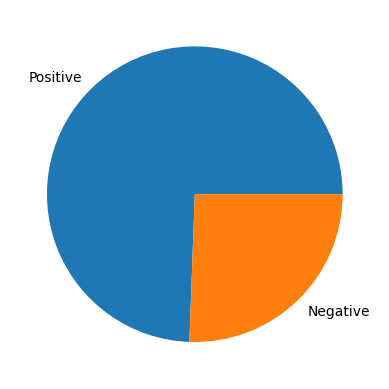

In [95]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [96]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 388.9 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 581.0 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 762.6 kB/s eta 0:00:01
   ---------------------------------- --- 235.5/258.3 kB 958.6 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 983.0 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 983.0 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 983.0 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 634.5 kB/s eta 0:00:00


In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9430, 1145) (9430,)


In [98]:
y_train_smote.value_counts()

label
0    4715
1    4715
Name: count, dtype: int64

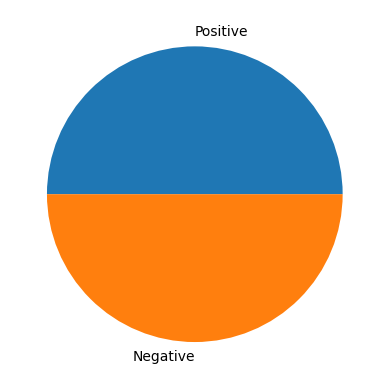

In [99]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [100]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.5262809, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.9124008, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [101]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9425    1
9426    1
9427    1
9428    1
9429    1
Name: label, Length: 9430, dtype: int64

In [102]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [103]:
y_test

6072    0
1695    0
7735    1
2278    0
288     0
       ..
2414    0
1817    1
3902    0
3156    0
2493    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [111]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


## Logistic Regression

In [122]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.918
	Recall = 0.967
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.867
	Precision = 0.701
	Recall = 0.84
	F1-Score = 0.764


## Naive Bayes

In [123]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.91
	Precision = 0.871
	Recall = 0.963
	F1-Score = 0.915
Testing Scores:
	Accuracy = 0.871
	Precision = 0.68
	Recall = 0.936
	F1-Score = 0.788


## Decision Tree

In [124]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.814
	Precision = 0.628
	Recall = 0.667
	F1-Score = 0.647


## Random Forest

In [125]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.859
	Precision = 0.722
	Recall = 0.726
	F1-Score = 0.724


## Support Vector Machine

In [126]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.966
	Recall = 0.993
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.876
	Precision = 0.73
	Recall = 0.82
	F1-Score = 0.772


In [127]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)